# Movimento Browniano com Equações de Langevin

## Introdução Teórica 

Podemos simular o movimento de uma partícula imersa num fluido, também chamado de movimento browniano, usando o modelo de Langevin. De acordo com Langevin, o movimento de uma partícula imersa num fluido pode ser visto como o resultado de duas forças atuando na partícula: uma dissipativa, geralmente proporcional e contrária à velocidade, e outra de caráter aleatório - oriunda das colisões com as demais partículas do fluido.

$$m\frac{dv}{dt} = -\gamma v + F(t) \tag{1}$$

Trataremos a velocidade $v$ como escalar, pois a simulação será para uma dimensão.

$ F(t) $ é a força aleatória e possui as seguintes propriedades:

- $ P_1 $: $\langle F(t) \rangle = 0 $
- $ P_2 $: $ \langle F(t) F(t + \tau) \rangle = \langle F^2(t) \rangle \delta(\tau), \tau \gt 0 $

$P_2$ diz que não há correlação entre uma força e a seguinte. Isso não é verdade para líquidos, pois existem correlações hidrodinâmicas. No entanto, acaba sendo uma aproximação conveniente do ponto de vista matemático. Quanto maior a massa da partícula de interesse em relação às demais, melhor é essa aproximação. 

Como $ m \neq 0$, podemos dividir a Eq.(1) por $m$:

$\frac{dv}{dt} = -\alpha v + \zeta(t) \tag{2}$ sendo $\zeta(t) = \frac{F(t)}{m}$ e $\alpha = \frac{\gamma}{m}$

### Discretização das velocidades

Para fazermos simulações computacionais, precisamos discretizar o tempo, pois os computadores não são capazes de representar todo o espaço dos números reais. Fazendo $t = n\tau$, $n \in \mathbb{N}$, podemos escrever a Eq.(2) de forma aproximada:

$ v_{n+1} = a v_n + \sqrt{\tau \Gamma} \xi \tag{3}$ com $ \Gamma = 2\alpha K_b T / m$

A relação da velocidade com a temperatura vem da Teoria Cinética dos Gases e pode ser vista detalhadamente em TOMÉ, T.; OLIVEIRA, M. - Dinâmica Estocástica e Irreversibilidade, Edusp.

### Distribuição teórica das velocidades 

Uma densidade de probabilidade da variável $v_n$ é obtida pela transformada inversa de Fourier, resultando no seguinte:


$ P_n(v_n) = \frac{1}{\sqrt{2 \pi b_n}}exp\biggl({\frac{-v_n^2}{2 b_n}}\biggr) \tag{4}$ onde $ b_n = \frac{1-a^{2n}}{1-a^2}\tau \Gamma$ e $a = 1 - \tau \gamma$

### Discretização das posições 

Tendo as velocidades, podemos obter as equações de posição usando $v = \frac{dx}{dt}$. Note que $ \langle F(t) F(t + \tau) \rangle = \langle F^2(t) \rangle \delta(\tau)$ indica que $v$ não depende de $x$, isso significa que $v = \frac{dx}{dt}$ é uma equação diferencial separável e, portanto, podemos resolvê-la para x. Em seguida, discretizamos e obtemos:

$x_{n+1} = x_n + \tau v_n \tag{3}$

Agora podemos começar a simular o movimento browniano computacionalmente com Langevin.

## Simulação 

Para a simulação do movimento browniano em uma dimensão, usaremos a linguagem de programação Python.

Na célula abaixo, importamos módulos, funções e constantes que usaremos na simulação.

In [3]:
import numpy as np                         # Pacote para computação científica
from math import sqrt, exp, pi             # Funções úteis de matemática e pi
from matplotlib import pyplot as plt       # Módulo para a criação de gráficos

Apenas por conveniência, será feito o uso de um comando interno do Jupyter. Esse comando exibirá automaticamente os gráficos, sem a necessidade de chamar uma função para isso toda vez que quisermos plotar algo.

In [30]:
# Comando para exibir gráficos automaticamente
%matplotlib inline                         

### Simulação das Velocidades 

Como condições iniciais, escolheremos $x(0) = 0$ e $v(0) = 0$.

<b>Simul</b> é a principal função de toda a simulação. Através da abordagem descrita anteriormente, ela faz com que um número de partículas (<b>numPart</b>) seja simulado num movimento browniano unidimensional por <b>N</b> unidades de tempo <b>tau</b>.

In [31]:
'''
    ================================================================================
    Nome:       Simul, de simulação.
    ================================================================================
    Descrição:  Realiza a simulação do movimento browniano unidimensional
                através do modelo de Langevin, tendo x(0) = 0 = v(0)
                como condições iniciais.         
    ================================================================================
    Parâmetros: 
                - numPart: Número de partículas da simulação. 
                           Padrão = 100.
                           
                - N:       Número de unidades de tempo. 
                           Padrão = 10**5
                           
                - KbT:     Constante de Boltzmann vezes Temperatura Absoluta.
                           Padrão = 1.0
                
                - m:       Massa da partícula de interesse.
                           Padrão = 1.0
                           
                - gamma:   Coeficiente de amortecimento em fluido.
                           Padrão 1.0
                        
                - tau:     Unidade de tempo da simulação.
                           Padrão = 0.1
    ================================================================================
'''
def Simul(numPart=100, N=10**5, KbT=1., m=1., gamma=1., tau=.1):
    
    # Constantes apresentadas no desenvolvimento
    a, Gamma = 1 - tau*gamma, 2*gamma*KbT/m
    # V: velocidades em cada instante, Vs: todas as velocidades
    V, Vs = np.zeros(numPart), np.zeros([N, numPart])               
    # X: posições em cada instante, Xs: todas as posições
    X, Xs = np.zeros(numPart), np.zeros([N//10, numPart])             
    
    # N-1 iterações da simulação
    for i in range(1, N):
        # Gera uma força aleatória para cada partícula
        F = (-1)**np.random.randint(0, 2, size=numPart)
        # Calcula e armazena temporariamente as velocidades
        V = a*V + F*sqrt(tau*Gamma)/m
        # Calcula e armazena temporariamente as posições
        X += V*tau
        # Armazena as velocidades "definitivamente"
        Vs[i] = V
        # Pega uma posição a cada 10 unidades de tempo
        if i%10 == 0:
            # Armazena as posições "definitivamente"
            Xs[i//10] = X
            
    # Retorna velocidades e posições armazenadas
    return (Vs, Xs)

No <b>for</b> acima, fazemos <b>range(1, N)</b> para não sobrepor as condições iniciais - o que aconteceria por causa do <b>if</b>. Poderíamos ter contornado de outras maneiras, naturalmente.

Agora vamos testar a função <b>Simul</b> para <b>2000</b> partículas e guardar os dados para a plotagem dos gráficos.

In [101]:
Vs, Xs = Simul(numPart = 2000)

Abaixo definimos <b>PlotaVel</b> para criar os gráficos das velocidades. Essa função não foi feita para propósitos genéricos.

In [102]:
def PlotaVel():
    # Auxilia na plotagem da FDP teórica
    Aux = np.arange(-4, 4, .05)
    # Calcula FDP teórica com base em Aux
    P = np.exp(-Aux**2/2)*sqrt(1/(2*pi))
    # Plota histograma das velocidades
    plt.hist(Vs.flatten(), 100, color='g', density=True, label='Simulação')
    # Plota FDP teórica para as velocidades
    plt.plot(Aux, P, label = 'FDP teórica', linewidth=3, color='r')
    
    # Bloco de estilização
    plt.title('Distribuição de Velocidades', fontsize=20)
    plt.xlabel('Velocidade (m/s)')
    plt.ylabel('Probabilidade')
    plt.ylim(0,0.45)
    plt.legend(loc='best')
    plt.text(2, .2, 'numPart=2000 \nN=10**5')

Hora de ver os resultados da simulação para as velocidades :)

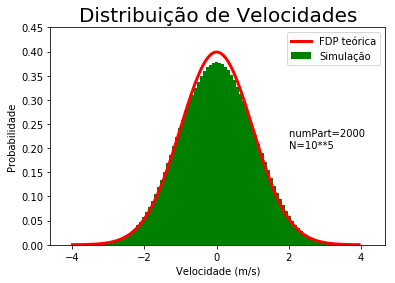

In [103]:
PlotaVel()

Agora definimos <b>PlotaPos</b> para os gráficos de posição. Novamente, não foi pensada para propósito genérico.

In [116]:
def PlotaPos():
    # Plota histograma das posições
    plt.hist(Xs.flatten(), 100, color='b', density=True, label='Simulação')
    
    # Bloco de estilização
    plt.title('Distribuição de Posições', fontsize=20)
    plt.xlabel('Posição m')
    plt.ylabel('Probabilidade')
    plt.legend(loc='best')
    plt.text(220, .002, 'numPart=2000 \nN=10**5')

E o histograma das posições fica:

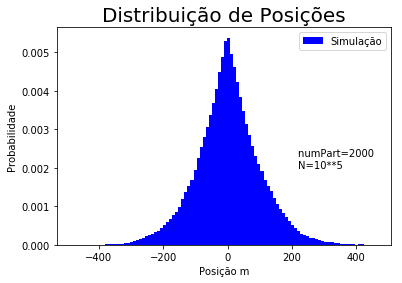

In [117]:
PlotaPos()

Como é de se esperar, a suavidade do histograma de posições aumenta conforme introduzimos mais tempo ou partículas.

Ele não acompanha a suavidade do histograma de velocidades pelo fato de armazenarmos as posições de 10 em 10. Se não armazenássemos dessa forma, precisaríamos de números muito maiores para ter a distribuição bem definida.

## Conclusão 

Por ser uma abordagem sem muitas complicações teóricas ou práticas, os resultados foram satisfatórios para a velocidade. No entanto, o histograma de posições ainda carece de checagem teórica.

Futuramente, podemos fazer a mesma simulação tendo como foco o desempenho, já que isso nos permitiria obter uma distribuição de posições melhor - e num tempo razoável.